In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
DATASET = "L1"

In [30]:
import re

def clean_whitespace(s):

    # Replace all runs of whitespace with a single dash
    s = re.sub(r"\s+", '_', s)

    return s

In [31]:
midatl = ""

with open(os.path.join("raw", DATASET, "CRNH0203-2015-RI_Kingston_1_NW.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2016-RI_Kingston_1_NW.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2017-RI_Kingston_1_NW.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2018-RI_Kingston_1_NW.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2019-RI_Kingston_1_NW.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    midatl += clean_whitespace(line).split("_")[9] + "\n"


with open(os.path.join("corrected", DATASET, "MIDATL.csv"), "w") as fp:
    fp.write("Temperature\n"+midatl)

In [32]:
west = ""

with open(os.path.join("raw", DATASET, "CRNH0203-2015-WV_Elkins_21_ENE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2016-WV_Elkins_21_ENE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2017-WV_Elkins_21_ENE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2018-WV_Elkins_21_ENE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2019-WV_Elkins_21_ENE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    west += clean_whitespace(line).split("_")[9] + "\n"


with open(os.path.join("corrected", DATASET, "WEST.csv"), "w") as fp:
    fp.write("Temperature\n"+west)

In [33]:
south = ""

with open(os.path.join("raw", DATASET, "CRNH0203-2015-VA_Charlottesville_2_SSE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2016-VA_Charlottesville_2_SSE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2017-VA_Charlottesville_2_SSE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2018-VA_Charlottesville_2_SSE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"

with open(os.path.join("raw", DATASET, "CRNH0203-2019-VA_Charlottesville_2_SSE.txt"), "r") as fp:
    lines = fp.readlines()
for line in lines:
    south += clean_whitespace(line).split("_")[9] + "\n"


with open(os.path.join("corrected", DATASET, "SOUTH.csv"), "w") as fp:
    fp.write("Temperature\n"+south)

In [34]:
old_MIDATL = pd.read_csv(os.path.join("incorrect",DATASET,"MIDATL.csv"))
old_SOUTH = pd.read_csv(os.path.join("incorrect",DATASET,"SOUTH.csv"))
old_WEST = pd.read_csv(os.path.join("incorrect",DATASET,"WEST.csv"))

new_MIDATL = pd.read_csv(os.path.join("corrected",DATASET,"MIDATL.csv"))
new_SOUTH = pd.read_csv(os.path.join("corrected",DATASET,"SOUTH.csv"))
new_WEST = pd.read_csv(os.path.join("corrected",DATASET,"WEST.csv"))

In [35]:
old_MIDATL["Temperature"].corr(new_MIDATL["Temperature"])

-0.006213932809295662

In [36]:
old_SOUTH["Temperature"].corr(new_SOUTH["Temperature"])

-0.05911923668897273

In [37]:
old_WEST["Temperature"].corr(new_WEST["Temperature"])

0.08103885914975172

In [38]:
print(len(old_MIDATL), len(old_SOUTH), len(old_WEST))
print(len(new_MIDATL), len(new_SOUTH), len(new_WEST))

43824 43824 43824
43824 43824 43824


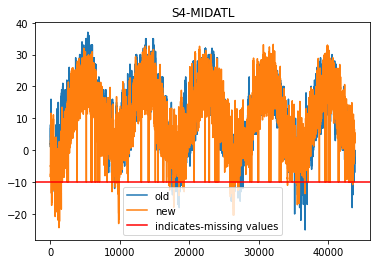

In [39]:
plt.plot(old_MIDATL["Temperature"], label="old")
plt.plot(new_MIDATL["Temperature"].replace(-9999.0, -10), label = "new")

plt.axhline(y = -10, color="red", label = "indicates-missing values")
plt.legend()
plt.title("S4-MIDATL")
plt.show()

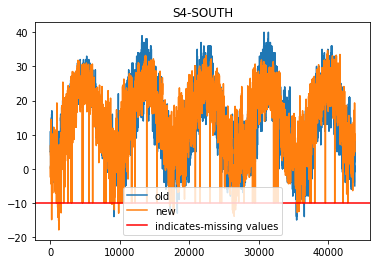

In [40]:
plt.plot(old_SOUTH["Temperature"], label="old")
plt.plot(new_SOUTH["Temperature"].replace(-9999.0, -10), label="new")

plt.axhline(y = -10, color="red", label = "indicates-missing values")
plt.legend()
plt.title("S4-SOUTH")

plt.show()

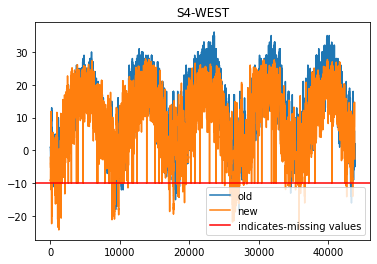

In [41]:
plt.plot(old_WEST["Temperature"], label="old")
plt.plot(new_WEST["Temperature"].replace(-9999.0, -10), label="new")

plt.axhline(y = -10, color="red", label = "indicates-missing values")

plt.title("S4-WEST")

plt.legend()
plt.show()

In [42]:
new_SOUTH["Net"] = old_SOUTH["Net"]
new_WEST["Net"] = old_WEST["Net"]
new_MIDATL["Net"] = old_MIDATL["Net"]


In [43]:
new_MIDATL[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"MIDATL.csv"), index=False)
new_WEST[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"WEST.csv"), index=False)
new_SOUTH[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"SOUTH.csv"), index=False)

In [44]:
midatl = new_MIDATL.Temperature.to_list()
west = new_WEST.Temperature.to_list()
south = new_SOUTH.Temperature.to_list()

In [45]:
for i in range(1, len(midatl)):
    if midatl[i] == -9999.0:
        midatl[i] = midatl[i-1]

for i in range(1, len(south)):
    if south[i] == -9999.0:
        south[i] = south[i-1]

for i in range(1, len(west)):
    if west[i] == -9999.0:
        west[i] = west[i-1]


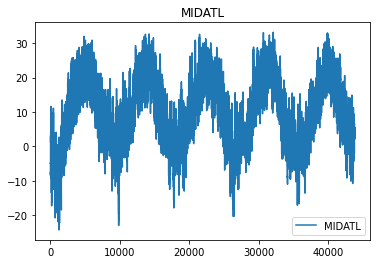

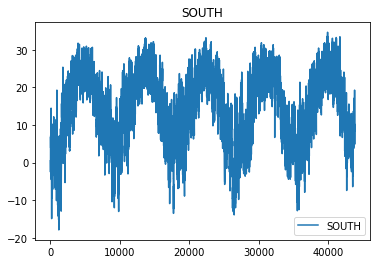

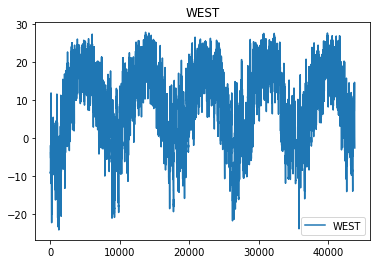

In [46]:
plt.title("MIDATL")
plt.plot(midatl, label="MIDATL")
plt.legend()
plt.show()

plt.title("SOUTH")
plt.plot(south, label = "SOUTH")
plt.legend()
plt.show()

plt.title("WEST")
plt.plot(west, label = "WEST")
plt.legend()
plt.show()


In [47]:
new_MIDATL.Temperature = midatl
new_WEST.Temperature = west
new_SOUTH.Temperature = south

new_MIDATL[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"MIDATL.csv"), index=False)
new_WEST[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"WEST.csv"), index=False)
new_SOUTH[["Net", "Temperature"]].to_csv(os.path.join("corrected",DATASET,"SOUTH.csv"), index=False)